In [1]:
# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm


In [2]:
vac_df = pd.read_csv("E:\project 3 logistic\h1n1_vaccine_prediction.csv")

In [3]:
vac_df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
vac_df.shape

(26707, 34)

In [5]:
vac_df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [6]:
vac_df.age_bracket.head(10)

0    55 - 64 Years
1    35 - 44 Years
2    18 - 34 Years
3        65+ Years
4    45 - 54 Years
5        65+ Years
6    55 - 64 Years
7    45 - 54 Years
8    45 - 54 Years
9    55 - 64 Years
Name: age_bracket, dtype: object

In [7]:
pd.set_option('display.max_row', None)

In [8]:
vac_df["h1n1_worry"].isna().sum()

92

In [9]:
vac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [10]:
# use 'for' loop to change the data type of variables 
for col in ['h1n1_worry','h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask',
            'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 
            'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition','cont_child_undr_6_mnths',
           'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 
            'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']:

    # use .astype() to change the data type
    vac_df[col] = vac_df[col].astype('object')

In [11]:
vac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   unique_id                  26707 non-null  int64 
 1   h1n1_worry                 26615 non-null  object
 2   h1n1_awareness             26591 non-null  object
 3   antiviral_medication       26636 non-null  object
 4   contact_avoidance          26499 non-null  object
 5   bought_face_mask           26688 non-null  object
 6   wash_hands_frequently      26665 non-null  object
 7   avoid_large_gatherings     26620 non-null  object
 8   reduced_outside_home_cont  26625 non-null  object
 9   avoid_touch_face           26579 non-null  object
 10  dr_recc_h1n1_vacc          24547 non-null  object
 11  dr_recc_seasonal_vacc      24547 non-null  object
 12  chronic_medic_condition    25736 non-null  object
 13  cont_child_undr_6_mnths    25887 non-null  object
 14  is_hea

In [12]:
#drop the field 'unique_id'
# axis=1: it stands for column
# inplace=True: it perform operations on original data
vac_df.drop('unique_id', axis=1, inplace=True)

In [13]:
vac_df.shape

(26707, 33)

In [14]:
vac_df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [15]:
# Spliting dataframe into target and feature
df_x = vac_df.iloc[:,:-1]  # here we are storiing all the columns except the last columns, we can also write like this [:, df_vaccine.columns != 'h1n1_vaccine']
df_y = vac_df.iloc[:, vac_df.columns == 'h1n1_vaccine'] # here we are seclecting the last column.

In [16]:
df_x.head(), df_y.head(), 

(  h1n1_worry h1n1_awareness antiviral_medication contact_avoidance  \
 0        1.0            0.0                  0.0               0.0   
 1        3.0            2.0                  0.0               1.0   
 2        1.0            1.0                  0.0               1.0   
 3        1.0            1.0                  0.0               1.0   
 4        2.0            1.0                  0.0               1.0   
 
   bought_face_mask wash_hands_frequently avoid_large_gatherings  \
 0              0.0                   0.0                    0.0   
 1              0.0                   1.0                    0.0   
 2              0.0                   0.0                    0.0   
 3              0.0                   1.0                    1.0   
 4              0.0                   1.0                    1.0   
 
   reduced_outside_home_cont avoid_touch_face dr_recc_h1n1_vacc  ...  \
 0                       1.0              1.0               0.0  ...   
 1                

In [17]:
print(df_x.shape)
print(df_y.shape)

(26707, 32)
(26707, 1)


In [18]:
df_x.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
count,26615.0,26591.0,26636.0,26499.0,26688.0,26665.0,26620.0,26625.0,26579.0,24547.0,...,25300,26707,26707,22284,25299,24665,25244,26707,26458.0,26458.0
unique,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,4,4,2,3,2,2,3,3,4.0,4.0
top,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0
freq,10575.0,14598.0,25335.0,19228.0,24847.0,22015.0,17073.0,17644.0,18001.0,19139.0,...,10097,21222,15858,12777,13555,18736,13560,11645,14474.0,18672.0


In [19]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of all categorical variables as tere are no numerical variables in the dataset
# use .transpose() for better readability, however its optional
df_x.describe().transpose()

,count,unique,top,freq
h1n1_worry,26615.0,4.0,2.0,10575.0
h1n1_awareness,26591.0,3.0,1.0,14598.0
antiviral_medication,26636.0,2.0,0.0,25335.0
contact_avoidance,26499.0,2.0,1.0,19228.0
bought_face_mask,26688.0,2.0,0.0,24847.0
wash_hands_frequently,26665.0,2.0,1.0,22015.0
avoid_large_gatherings,26620.0,2.0,0.0,17073.0
reduced_outside_home_cont,26625.0,2.0,0.0,17644.0
avoid_touch_face,26579.0,2.0,1.0,18001.0
dr_recc_h1n1_vacc,24547.0,2.0,0.0,19139.0


In [20]:
#For the independent categoric variables, we plot the count plot to check the distribution of each variables.

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ABC\anaconda3\lib\site-packa

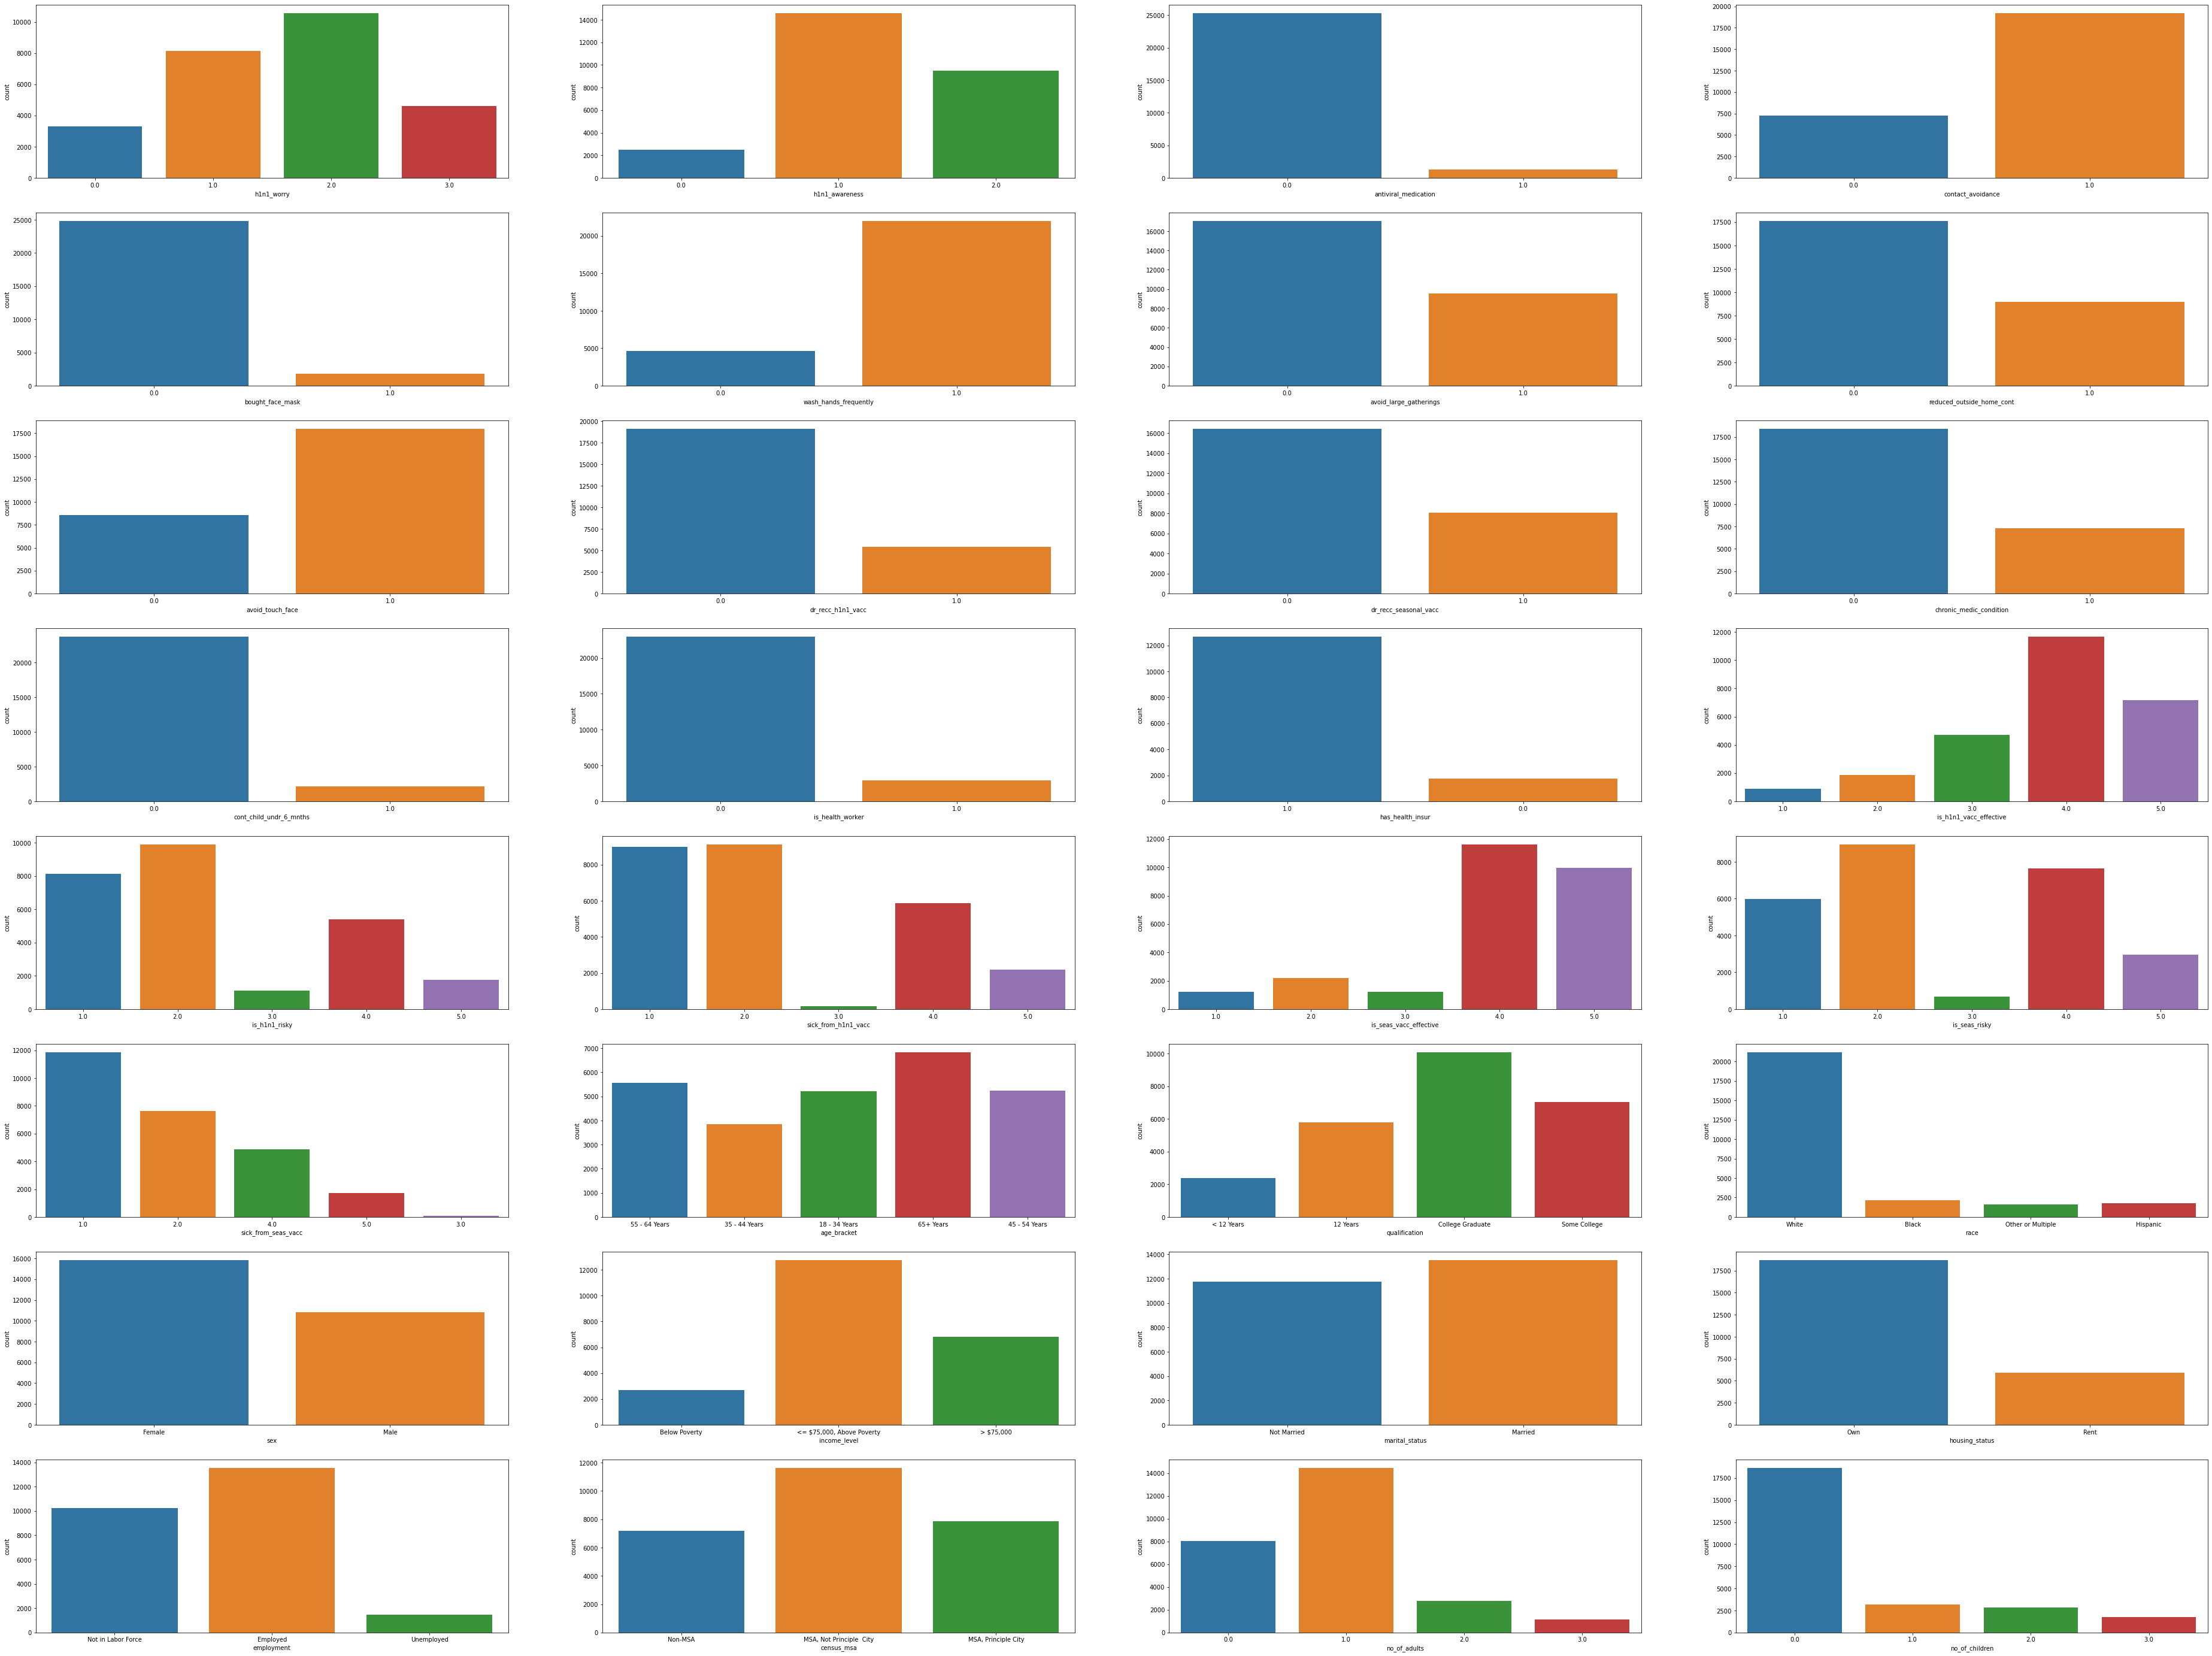

In [21]:
fig, ax = plt.subplots(nrows=8, ncols=4, figsize = (65, 50))
# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(df_x , ax.flatten()): #here varible will contain one value from the df_x and one value from ax and flatten makes it one dimensional
    sns.countplot(df_x[variable], ax = subplot) # here ax is showing where to plot
    
# display the plot
plt.show()

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

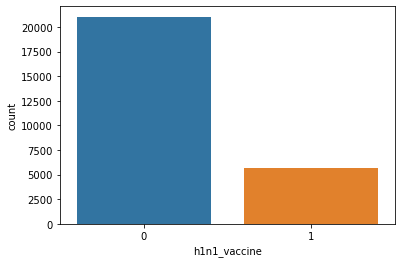

In [22]:
# plot the countplot of the variable 'h1n1_vaccine'
sns.countplot(x = df_y.h1n1_vaccine)

In [23]:
# get counts of 0's and 1's in the 'h1n1_vaccine' variable using 'value_counts()'
df_y.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [24]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = vac_df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (vac_df.isnull().sum()*100/vac_df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
has_health_insur,12274,45.957989
income_level,4423,16.561201
dr_recc_h1n1_vacc,2160,8.087767
dr_recc_seasonal_vacc,2160,8.087767
housing_status,2042,7.645936
employment,1463,5.477965
marital_status,1408,5.272026
qualification,1407,5.268282
chronic_medic_condition,971,3.635751
cont_child_undr_6_mnths,820,3.070356


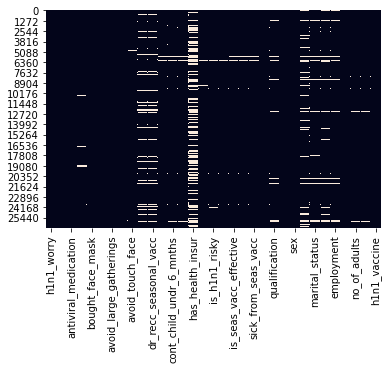

In [25]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(vac_df.isna(), cbar=False)

# display the plot
plt.show()

In [26]:
#Whole columns should be dropped only if most entries in the column are empty. 
#In our dataset, column has_health_insur has almost 46% missing values. Column income_level has 16% missing values. 
#Hence dropping these two columns. Also columns dr_recc_h1n1_vacc and dr_recc_seasonal_vacc have 8% missing values. 
#Has these two columns mostly tell about doctor's recommendation and not about the respondents, 
#I choose to drop these two columns as well. As a execrcise we can re-run the model with these two columns later.

In [27]:
vac_df.drop(['has_health_insur','income_level','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc'], axis=1, inplace=True)

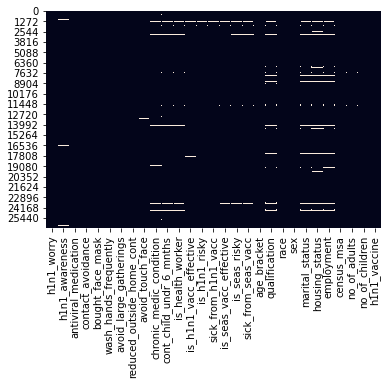

In [28]:
sns.heatmap(vac_df.isnull(), cbar=False)
plt.show()

In [29]:
vac_df.dropna(axis=0, inplace=True) #Delete the entire row/record/example (axis=0) if it has missing values for row axis is equal to zero

In [30]:
vac_df.shape

(23426, 29)

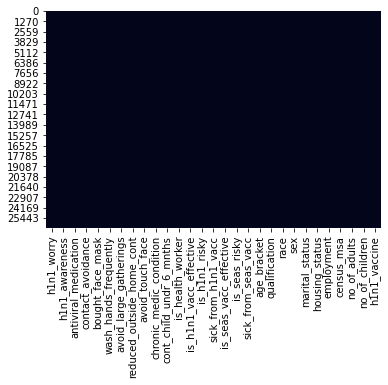

In [31]:
sns.heatmap(vac_df.isnull(), cbar=False)
plt.show()

In [32]:
vac_df.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [33]:
df_cat = vac_df.iloc[:,:-1]

In [34]:
df_cat.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,age_bracket,qualification,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,45 - 54 Years,Some College,White,Female,Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [35]:
df_num = vac_df.iloc[:, vac_df.columns == 'h1n1_vaccine']

In [36]:
df_num.head()

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0


In [37]:
print(df_cat.shape)
print(df_num.shape)

(23426, 28)
(23426, 1)


In [38]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)

In [39]:
# check the first five observations of the data with dummy encoded variables
df_cat_dummies.head()

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,...,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [40]:
y = df_num.copy()
x = df_cat_dummies.copy()

In [41]:
y.head()

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0


In [42]:
x.head()

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,...,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [43]:
x.shape

(23426, 62)

In [44]:
#Logistic regression is one of the techniques used for classification. 
#The estimates of the parameters are obtained by maximizing the likelihood function.

In [45]:
# add the intercept(=Bias) column using 'add_constant()'
x = sm.add_constant(x)

# print the first five bservations after adding intercept
x.head()

,const,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,...,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1.0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,1.0,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,1,0,0,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
4,1.0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [46]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 10) #train_test_split imported from sklearn

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (16398, 63)
y_train (16398, 1)
X_test (7028, 63)
y_test (7028, 1)


In [47]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
log_reg_model = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.414325
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           h1n1_vaccine   No. Observations:                16398
Model:                          Logit   Df Residuals:                    16335
Method:                           MLE   Df Model:                           62
Date:                Mon, 15 Nov 2021   Pseudo R-squ.:                  0.1990
Time:                        11:06:03   Log-Likelihood:                -6794.1
converged:                       True   LL-Null:                       -8482.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.4648      0.297    -15.041     

In [48]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = log_reg_model.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

9480     0.193582
25478    0.663039
16789    0.091390
8036     0.121057
7121     0.156698
dtype: float64

In [49]:
type(y_pred_prob)

pandas.core.series.Series

In [50]:
y_pred_prob.shape

(7028,)

In [51]:
y_pred_prob.head() #Model's prediction

9480     0.193582
25478    0.663039
16789    0.091390
8036     0.121057
7121     0.156698
dtype: float64

In [52]:
y_test.head() #Ground truth

,h1n1_vaccine
9480,0
25478,1
16789,1
8036,1
7121,0


In [53]:
#Since the target variable can take only two values either 0 or 1. We decide the threshold of 0.5. 
# If y_pred_prob is less than 0.5, then consider it to be 0 else consider it to be 1.

#We have seen that the dataset is not balanced. We may check model performance parameters for different threshold values to classify as 0 and 1.
#As an exercise check the impact on performance parameters for different threshold values.


In [54]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob] 
# convert the predicted values to type 'float32'
y_pred = np.array(y_pred, dtype=np.float32)

# print the first five predictions
y_pred[0:5]

array([0., 1., 0., 0., 0.], dtype=float32)

In [55]:
y_pred.shape

(7028,)

In [56]:
y_test.head()

,h1n1_vaccine
9480,0
25478,1
16789,1
8036,1
7121,0


In [57]:
#ploting confusion matrix

In [58]:
confusion_matrix(y_test, y_pred)

array([[5204,  272],
       [1037,  515]], dtype=int64)

In [59]:
# compute the performance measures on test data
test_report = classification_report(y_test, y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5476
           1       0.65      0.33      0.44      1552

    accuracy                           0.81      7028
   macro avg       0.74      0.64      0.66      7028
weighted avg       0.79      0.81      0.79      7028



In [60]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression model to the function
cohen_kappa_score(y_test, y_pred)

0.3426774787926872

In [61]:
#Interpretation: As the kappa score for the logistic regression (SGD) is 0.3047, 
#we can say that there is low to moderate agreement between the actual and predicted values.

In [62]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [63]:
fpr

array([0.        , 0.        , 0.        , ..., 0.98995617, 0.98995617,
       1.        ])

In [64]:
tpr 

array([0.00000000e+00, 6.44329897e-04, 6.44329897e-03, ...,
       9.99355670e-01, 1.00000000e+00, 1.00000000e+00])

In [65]:
thresholds

array([1.9118104 , 0.9118104 , 0.88541511, ..., 0.01312031, 0.01306408,
       0.00559556])

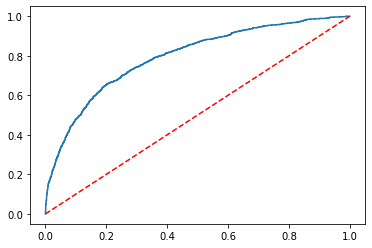

In [66]:
# plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')

In [67]:
auc_score = (round(roc_auc_score(y_test, y_pred_prob),4))

In [68]:
auc_score

0.7944

In [69]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

In [70]:
score_card = score_card.append({'Model': "Logistic Regression",
                                    'AUC Score' : auc_score,
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [71]:
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.7944,0.654384,0.33183,0.813745,0.342677,0.440359


In [72]:
#Logistic Regression (using SGD)

In [93]:
#To build the logistic model on scaled features using SGD from sklearn, we do the following:

#1. Scale the data
#2. Split the data into training and test sets
#3. Build the model
#4. Do predictions on the test set
#5. Compute accuracy measures
#6. Tabulate the results 

In [94]:
#The SGDClassifier() from sklearn contains an intercept term. Thus, there is no need to add the column of intercept.

In [95]:
# instantiate the 'SGDClassifier' to build model using SGD
# to perform logistic regression, consider the log-loss function 
# set 'random_state' to generate the same dataset each time you run the code 
SGD = SGDClassifier(loss = 'log', random_state = 10) # here we pass loss equals to log for the logistics regression

# fit the model on scaled training data
logreg_with_SGD = SGD.fit(X_train, y_train)

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [96]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = logreg_with_SGD.predict_proba(X_test)[:,1]

In [98]:
# use predict() to predict the class labels of target variable
y_pred = logreg_with_SGD.predict(X_test)

In [99]:
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [101]:
y_test.head()

,h1n1_vaccine
9480,0
25478,1
16789,1
8036,1
7121,0


In [105]:
# call the function to plot the confusion matrix
# pass the logistic regression (SGD) model to the function
confusion_matrix(y_test, y_pred)

array([[5253,  223],
       [1113,  439]], dtype=int64)

In [108]:
# compute the performance measures on test data
test_report = classification_report(y_test, y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5476
           1       0.66      0.28      0.40      1552

    accuracy                           0.81      7028
   macro avg       0.74      0.62      0.64      7028
weighted avg       0.79      0.81      0.78      7028



In [109]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression model to the function
cohen_kappa_score(y_test, y_pred)

0.30475321107275866

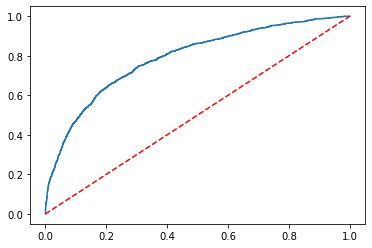

In [110]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')

In [111]:
auc_score1 = (round(roc_auc_score(y_test, y_pred_prob),4))
auc_score

0.7886

In [112]:
score_card = score_card.append({'Model': "Logistic Regression with sdg",
                                    'AUC Score' : auc_score,
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [113]:
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.7944,0.654384,0.331830,0.813745,0.342677,0.440359
1,Logistic Regression with sdg,0.7886,0.663142,0.282861,0.809903,0.304753,0.396567


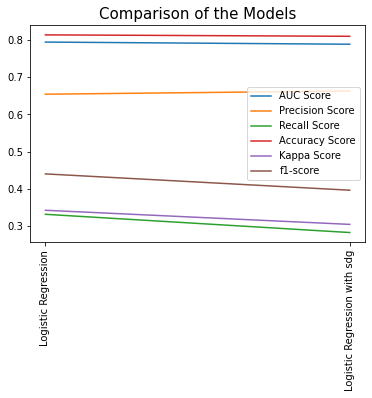

In [114]:
# plot the graph
# by default, plot() returns the line plot
score_card.plot()

# set the text size of the title
plt.title(label = 'Comparison of the Models', fontsize = 15)

# set the model names as x-ticks
# 'score_card.Model' retuns the model names
# rotate the x-axis labels vertically
plt.xticks([0,1], list(score_card.Model), rotation = 'vertical')

# display the plot
plt.show()